In [1]:
#import csv # 읽어만 보겠다. # pandas는 메모리에 계속 가지고 있으나, csv는 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "axes_unicode_minus" on line 3 in
/home/jovyan/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
r_df = pd.read_csv("subwaytime.csv", sep=',', encoding='cp949') # excel엔코딩 cp949, 여타 utf-8 ==> sheet_name='subwaytime'
r_df.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0


In [3]:
r_df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51'],
      dtype='objec

In [4]:
#r_df.info()


## 7 ~ 9시 승차인원 많은 지하철

In [5]:
# 7 ~ 9시 승차인원 슬라이싱
r_df.iloc[:,10:15:2].head()

,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
0,승차,승차,승차
1,39110,80492,61108
2,7703,9978,12818
3,6733,11028,14563
4,6066,9735,14261


In [6]:
s_df=r_df.iloc[:,10:15:2]
s_df.head()

,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
0,승차,승차,승차
1,39110,80492,61108
2,7703,9978,12818
3,6733,11028,14563
4,6066,9735,14261


In [7]:
#문자열을 숫자로 변경하기 
s_df=s_df.iloc[1:,:].apply(pd.to_numeric)  #s_df=s_df.to_numeric()
s_df.head()

,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
1,39110,80492,61108
2,7703,9978,12818
3,6733,11028,14563
4,6066,9735,14261
5,5143,8509,12652


In [8]:
# 승차인원 합
s_df.sum()

07:00:00~07:59:59    16485348
08:00:00~08:59:59    19843950
09:00:00~09:59:59    12357620
dtype: int64


## 시간대별 사람들이 가장 많이 타고 내리는 역 

In [9]:
#시간대별 승차인원 # index가 1부터 시작되고 있음에 유의
n1_df=r_df.iloc[:,4:51:2].iloc[1:,:].apply(pd.to_numeric)
n1_df.head()

,04:00:00~04:59:59,05:00:00~05:59:59,06:00:00~06:59:59,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59,10:00:00~10:59:59,11:00:00~11:59:59,12:00:00~12:59:59,13:00:00~13:59:59,...,18:00:00~18:59:59,19:00:00~19:59:59,20:00:00~20:59:59,21:00:00~21:59:59,22:00:00~22:59:59,23:00:00~23:59:59,00:00:00~00:59:59,01:00:00~01:59:59,02:00:00~02:59:59,03:00:00~03:59:59
1,927,10682,13504,39110,80492,61108,68446,89100,98021,101282,...,249973,142575,97729,96955,70982,33149,3612,0,0,0
2,74,2409,3532,7703,9978,12818,16470,22512,26040,34728,...,170225,76142,57394,58745,38156,14478,981,3,0,0
3,100,4409,4593,6733,11028,14563,20165,34617,42088,59893,...,257735,134259,113555,135586,111743,54264,4886,0,0,0
4,122,5061,3876,6066,9735,14261,24063,42723,58902,76615,...,129847,95225,68613,76067,62004,25970,3214,0,0,0
5,43,1934,2935,5143,8509,12652,20434,31918,45533,60255,...,133826,72550,49690,40800,32727,12013,785,1,0,0


In [10]:
n2_df=n1_df.copy()
n2_df["지하철"] = r_df["지하철역"]
#n_df["호선명"] = r_df["호선명"]
n2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 1 to 598
Data columns (total 25 columns):
04:00:00~04:59:59    598 non-null int64
05:00:00~05:59:59    598 non-null int64
06:00:00~06:59:59    598 non-null int64
07:00:00~07:59:59    598 non-null int64
08:00:00~08:59:59    598 non-null int64
09:00:00~09:59:59    598 non-null int64
10:00:00~10:59:59    598 non-null int64
11:00:00~11:59:59    598 non-null int64
12:00:00~12:59:59    598 non-null int64
13:00:00~13:59:59    598 non-null int64
14:00:00~14:59:59    598 non-null int64
15:00:00~15:59:59    598 non-null int64
16:00:00~16:59:59    598 non-null int64
17:00:00~17:59:59    598 non-null int64
18:00:00~18:59:59    598 non-null int64
19:00:00~19:59:59    598 non-null int64
20:00:00~20:59:59    598 non-null int64
21:00:00~21:59:59    598 non-null int64
22:00:00~22:59:59    598 non-null int64
23:00:00~23:59:59    598 non-null int64
00:00:00~00:59:59    598 non-null int64
01:00:00~01:59:59    598 non-null int64
02:00:00~02:59:

In [51]:
# column 0 최대값
n2_df.iloc[:,0].max()

8418

In [44]:
# column 0 최대값일때 index  # idxmax() 위치기반(보이는 index) 리턴함
n2_df.iloc[:,0].idxmax() #idxmax() === 구버전 argmax()

129

In [55]:
# column 0 최대값일때  리턴된 129는 # idxmax() 위치기반(보이는 index) 리턴함
print(n2_df.iloc[n2_df.iloc[:,0].idxmax()]["04:00:00~04:59:59"]) # 위치기반
print(n2_df.loc[n2_df.iloc[:,0].idxmax()]["04:00:00~04:59:59"]) # 명칭기반 
print(n2_df.iloc[n2_df.iloc[:,0].idxmax()-1]["04:00:00~04:59:59"])

1020
8418
8418


In [57]:
# column 0 최대값일때 지하철
n2_df.loc[n2_df.iloc[:,0].idxmax()]["지하철"]

'구로'

In [48]:
# idxmax()  # df['column'].map(lambda x:func(x)) # df.apply(lambda x:func(x.name), axis=) # applymap lambda x:func(x.index)
# map은 series만 가능하나, #apply는 series와 DataFrame 모두 가능함, 

# idxmax 결과를 치환받을 경우 숫자 데이터만 있는 n1_df로 해야 함. 문자가 있으면 loop에 빠짐
# n_df['1순위']=n_df.idxmax(axis=0) #reduction operation 'argmax' not allowed for this dtype

#import pdb; pdb.set_trace()  # 디버깅  

#apply iloc기반이므로 
print(type(n1_df.apply(lambda x : x.idxmax()-1, axis=0))) #<class 'pandas.core.series.Series'>
print(n1_df.apply(lambda x : x.idxmax()-1, axis=0)) # 시간대 column명과 최대값 위치기반(보이지않는) index 리턴 cf) 명칭기반 index

<class 'pandas.core.series.Series'>
04:00:00~04:59:59    128
05:00:00~05:59:59     48
06:00:00~06:59:59     39
07:00:00~07:59:59     39
08:00:00~08:59:59     39
09:00:00~09:59:59     39
10:00:00~10:59:59     39
11:00:00~11:59:59     39
12:00:00~12:59:59     31
13:00:00~13:59:59     31
14:00:00~14:59:59     31
15:00:00~15:59:59     31
16:00:00~16:59:59     31
17:00:00~17:59:59     31
18:00:00~18:59:59     31
19:00:00~19:59:59     31
20:00:00~20:59:59     31
21:00:00~21:59:59     31
22:00:00~22:59:59     31
23:00:00~23:59:59     31
00:00:00~00:59:59     31
01:00:00~01:59:59     31
02:00:00~02:59:59    103
03:00:00~03:59:59    536
dtype: int64


In [58]:
print(type(n1_df.apply(lambda x : x.idxmax()-1, axis=0).apply(lambda x:n2_df.iloc[x]["지하철"])))
print(n1_df.apply(lambda x : x.idxmax()-1, axis=0).apply(lambda x:n2_df.iloc[x]["지하철"]))#<class 'pandas.core.series.Series'>
# n1_df에서 리턴받은 index로  n2_df의 지하철은 추출해 내는 
# 변수로 받아 pd-> np 변환 : df.values     리스트로 변환 : df.values.tolist()

<class 'pandas.core.series.Series'>
04:00:00~04:59:59            구로
05:00:00~05:59:59          홍대입구
06:00:00~06:59:59            신림
07:00:00~07:59:59            신림
08:00:00~08:59:59            신림
09:00:00~09:59:59            신림
10:00:00~10:59:59            신림
11:00:00~11:59:59            신림
12:00:00~12:59:59            강남
13:00:00~13:59:59            강남
14:00:00~14:59:59            강남
15:00:00~15:59:59            강남
16:00:00~16:59:59            강남
17:00:00~17:59:59            강남
18:00:00~18:59:59            강남
19:00:00~19:59:59            강남
20:00:00~20:59:59            강남
21:00:00~21:59:59            강남
22:00:00~22:59:59            강남
23:00:00~23:59:59            강남
00:00:00~00:59:59            강남
01:00:00~01:59:59            강남
02:00:00~02:59:59    성신여대입구(돈암)
03:00:00~03:59:59           신방화
dtype: object


In [16]:
# column 별 최대값
print(type(n1_df.apply(lambda x : x.max(), axis=0))) # <class 'pandas.core.series.Series'>
print(n1_df.apply(lambda x : x.max(), axis=0))
# 변수로 받아 pd-> np 변환 : df.values     리스트로 변환 : df.values.tolist()

<class 'pandas.core.series.Series'>
04:00:00~04:59:59      8418
05:00:00~05:59:59     42966
06:00:00~06:59:59     80407
07:00:00~07:59:59    243083
08:00:00~08:59:59    355172
09:00:00~09:59:59    211286
10:00:00~10:59:59    113830
11:00:00~11:59:59     98765
12:00:00~12:59:59    126159
13:00:00~13:59:59    170216
14:00:00~14:59:59    169097
15:00:00~15:59:59    203483
16:00:00~16:59:59    227268
17:00:00~17:59:59    291623
18:00:00~18:59:59    431115
19:00:00~19:59:59    292521
20:00:00~20:59:59    235489
21:00:00~21:59:59    295326
22:00:00~22:59:59    314609
23:00:00~23:59:59    145504
00:00:00~00:59:59     27203
01:00:00~01:59:59        36
02:00:00~02:59:59         3
03:00:00~03:59:59         1
dtype: int64


In [63]:
# station_nd=n1_df.apply(lambda x : x.idxmax()-1, axis=0).apply(lambda x:n2_df.iloc[x]["지하철"]).values
# max_nd=n1_df.apply(lambda x : x.max(), axis=0).values

# series -> DataFrame 만들기
station_s=n1_df.apply(lambda x : x.idxmax()-1, axis=0).apply(lambda x:n2_df.iloc[x]["지하철"])
max_s=n1_df.apply(lambda x : x.max(), axis=0)
df = pd.DataFrame([max_s,station_s]) # index
df


,04:00:00~04:59:59,05:00:00~05:59:59,06:00:00~06:59:59,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59,10:00:00~10:59:59,11:00:00~11:59:59,12:00:00~12:59:59,13:00:00~13:59:59,...,18:00:00~18:59:59,19:00:00~19:59:59,20:00:00~20:59:59,21:00:00~21:59:59,22:00:00~22:59:59,23:00:00~23:59:59,00:00:00~00:59:59,01:00:00~01:59:59,02:00:00~02:59:59,03:00:00~03:59:59
0,8418,42966,80407,243083,355172,211286,113830,98765,126159,170216,...,431115,292521,235489,295326,314609,145504,27203,36,3,1
1,구로,홍대입구,신림,신림,신림,신림,신림,신림,강남,강남,...,강남,강남,강남,강남,강남,강남,강남,강남,성신여대입구(돈암),신방화


In [17]:
# # 위에 두번을 한번으로 합치기 시도
# # %%timeit   # %lprun -f 당해줄의 성능표시
# def rmax(x):
#     idx=x.idxmax()
#     value=x.max()
#     return idx, value

# def rmax1(df):
#     df.apply()
#     idx=x.idxmax()
#     value=x.max()
#     return idx, value


# #print(type(n1_df.apply(lambda x : rmax(x), axis=0))) #<class 'pandas.core.series.Series'>
# #print(n1_df.apply(lambda x : rmax(x), axis=0)) # 04:00:00~04:59:59     (129, 8418)
#                                                # 05:00:00~05:59:59     (49, 42966)
# #print(n1_df.apply(lambda x : rmax(x)[1], axis=0)) # 04:00:00~04:59:59  8418
#                                                # 05:00:00~05:59:59   42966
# #import pdb; pdb.set_trace()  # 디버깅      
# #print(n1_df.apply(lambda x : rmax(x), axis=0)) #.apply(lambda x:n2_df.iloc[x[0], :]["지하철"]))
# y=n1_df.apply(lambda x : rmax(x), axis=0) #.apply(lambda x:n2_df.iloc[x[0], :]["지하철"]))
# y.head()
# #.apply(lambda x:n2_df.iloc[x]["지하철"])))
#     #.apply(lambda x:n2_df.iloc[x]["지하철"]))
# #print(n1_df.apply(lambda x : x.max(), axis=0))

04:00:00~04:59:59     (129, 8418)
05:00:00~05:59:59     (49, 42966)
06:00:00~06:59:59     (40, 80407)
07:00:00~07:59:59    (40, 243083)
08:00:00~08:59:59    (40, 355172)
dtype: object

In [28]:
#%%timeit
# for문으로 처리
def loop(df):
    mx=[]
    mx_station=[]
    #print(len(s_df)) # 598
    for i in range(24): # len(df) error
        #print(i)
        #idx = df.iloc[:,i].idxmax()
        value = df.iloc[:,i].max()
        #value = df.iloc[idx, i]
        station = df.iloc[df.iloc[:,i].idxmax()]["지하철"]
        #print(f'idx:{idx}')
        #print(f'{n_df.loc[idx]["지하철"]}')
        #print(f'{station}')
        print(f'{value}')
        mx.append(value)
        mx_station.append(station)
#     print(mx)
#     print(mx_station)
    return mx, mx_station
loop(n2_df)

8418
42966
80407
243083
355172
211286
113830
98765
126159
170216
169097
203483
227268
291623
431115
292521
235489
295326
314609
145504
27203
36
3
1


([8418,
  42966,
  80407,
  243083,
  355172,
  211286,
  113830,
  98765,
  126159,
  170216,
  169097,
  203483,
  227268,
  291623,
  431115,
  292521,
  235489,
  295326,
  314609,
  145504,
  27203,
  36,
  3,
  1],
 ['가산디지털단지',
  '신촌',
  '신대방',
  '신대방',
  '신대방',
  '신대방',
  '신대방',
  '신대방',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '교대(법원.검찰청)',
  '한성대입구(삼선교)',
  '마곡나루'])

In [19]:
time=[]
for t in range(4,28):
    if t<25:
        time.append(t)
    else:
        time.append(t-24)

In [30]:
import matplotlib
import matplotlib.font_manager

[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf',
 '/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf',
 '/opt/con

8418
42966
80407
243083
355172
211286
113830
98765
126159
170216
169097
203483
227268
291623
431115
292521
235489
295326
314609
145504
27203
36
3
1
8418
42966
80407
243083
355172
211286
113830
98765
126159
170216
169097
203483
227268
291623
431115
292521
235489
295326
314609
145504
27203
36
3
1


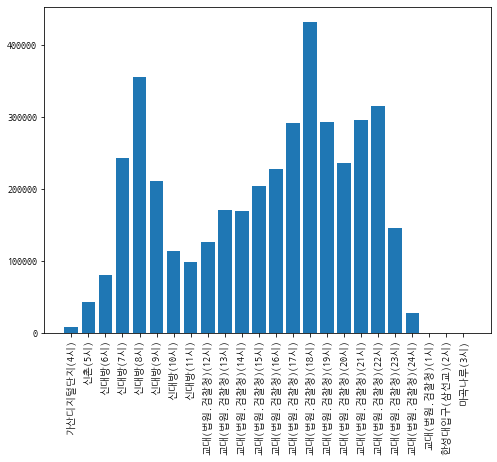

In [32]:
mx, mx_station = loop(n2_df)
#한글 
plt.rc('font', family='NanumGothicCoding')

plt.figure(figsize=(8,6)) # dpi = 300 figsize=(8,6) # dpi 해상도임  # dp 상관없이 똑같이 보이게끔 하는 옵션 ==> 게임이나 모바일에서사용 python지원안됨
plt.bar(range(24),mx) # loop(n2_df)[0] => mx
lst=list(range(4,28))
#print(lst)
station=list(map(lambda x, y : x + '(' + str(y)+'시)', mx_station, time))
#print(station)

plt.xticks(range(24), station, rotation=90) #
plt.show()

In [65]:
# series -> DataFrame 만들기
station_s=n1_df.apply(lambda x : x.idxmax()-1, axis=0).apply(lambda x:n2_df.iloc[x]["지하철"])
max_s=n1_df.apply(lambda x : x.max(), axis=0)
df = pd.DataFrame([max_s,station_s]) # index
df

,04:00:00~04:59:59,05:00:00~05:59:59,06:00:00~06:59:59,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59,10:00:00~10:59:59,11:00:00~11:59:59,12:00:00~12:59:59,13:00:00~13:59:59,...,18:00:00~18:59:59,19:00:00~19:59:59,20:00:00~20:59:59,21:00:00~21:59:59,22:00:00~22:59:59,23:00:00~23:59:59,00:00:00~00:59:59,01:00:00~01:59:59,02:00:00~02:59:59,03:00:00~03:59:59
0,8418,42966,80407,243083,355172,211286,113830,98765,126159,170216,...,431115,292521,235489,295326,314609,145504,27203,36,3,1
1,구로,홍대입구,신림,신림,신림,신림,신림,신림,강남,강남,...,강남,강남,강남,강남,강남,강남,강남,강남,성신여대입구(돈암),신방화


In [93]:
df_t= df.T # inplace 옵션 없음
df_t.reset_index(inplace=True)
df_t.columns=['시간대', '최대승객수', '지하철역']
df_t.head(3)

,시간대,최대승객수,지하철역
0,04:00:00~04:59:59,8418,구로
1,05:00:00~05:59:59,42966,홍대입구
2,06:00:00~06:59:59,80407,신림


Text(0, 0.5, '승객수')

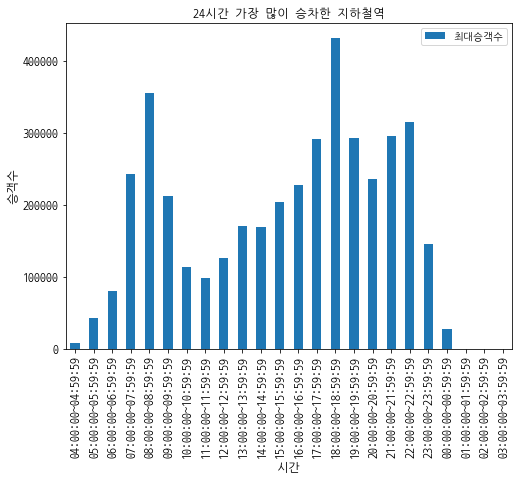

In [95]:
# df 판다스로 그림그리기
ax=df_t.plot(kind='bar',
             x='시간대',
             y='최대승객수',
                title='24시간 가장 많이 승차한 지하철역',
                figsize=(8,6),
                legend=True,
                fontsize=12)
ax.set_xlabel('시간', fontsize=12)
ax.set_ylabel('승객수',fontsize=12)
#ax.legend(['기온', '습도'], fontsize=12)

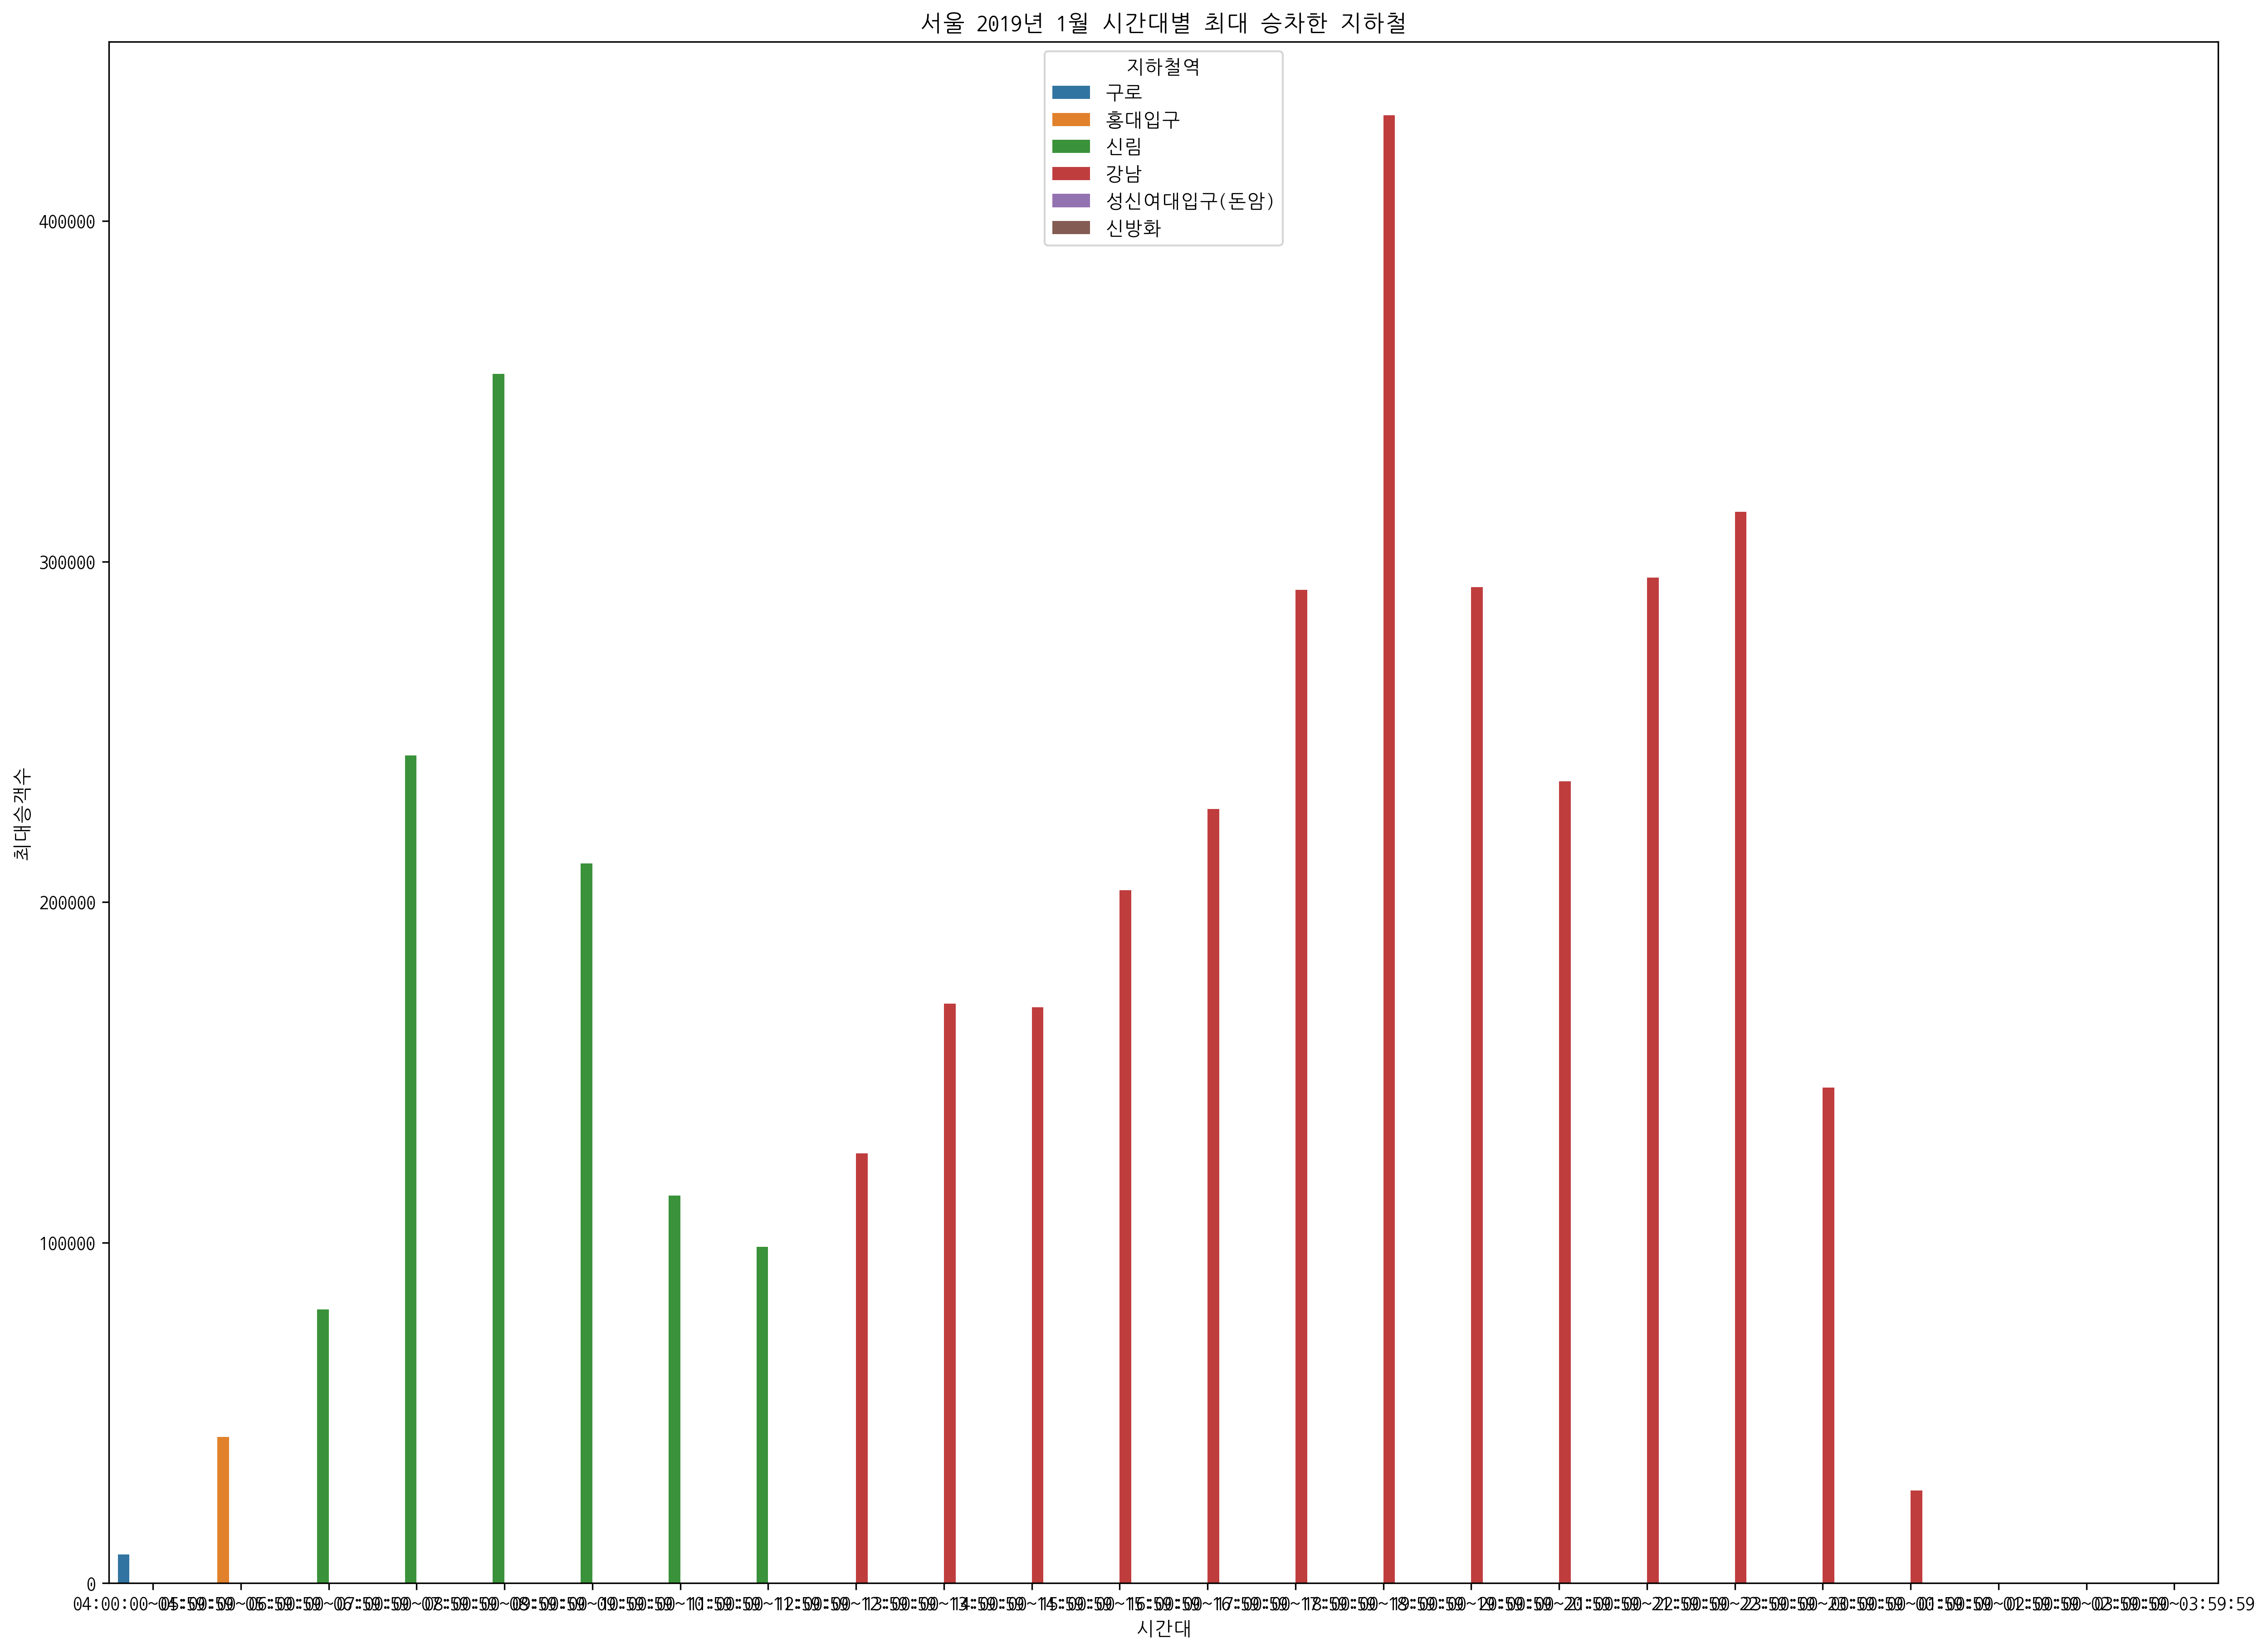

In [103]:
import seaborn as sns
plt.figure(dpi = 300)
#plt.rcParams['figure.figsize'] = [8, 6] # setting figure size

# 다차원복합데이터
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_df) # hue label 
#sns.barplot(x="temperature", y="humidity", hue="point", data=city_nd)

# 2차원복합데이터
sns.barplot(x="시간대", y="최대승객수", data=df_t, hue='지하철역') # 2차원 복합 ===> 성공
# data : DataFrame, array, or list of arrays,
# x, y, hue : names of variables in ``data`` or vector data, optional
#     Inputs for plotting long-form data. See examples for interpretation.    

# 1차원데이터
#sns.distplot(df, kde=True, rug=True) # error # Series, 1d-array, or list.

# catplot  => 실패
# sns.catplot(x="temperature", y="humidity", hue="point", row="humidity", data=city_df,
#             kind="bar", split=False, height=2, aspect=4)

plt.title("서울 2019년 1월 시간대별 최대 승차한 지하철")
#plt.legend()
plt.show()